In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('C:/Users/TOSHIBA/anaconda3/octopus.csv')

In [4]:
print(df.head())

                  Name                                        Description  \
0        Healing Grape                      Restores HP to a single ally.   
1    Healing Grape (M)              Greatly restores HP to a single ally.   
2  Healing Grape Bunch                         Restores HP to all allies.   
3    Shady Grape Bunch  Greatly restores HP to all allies, but reduces...   
4     Inspiriting Plum                      Restores SP to a single ally.   

   Buy_Price_Leaves  Sell_Price_Leaves    Item_Type  
0                50                  5  Consumables  
1               260                 26  Consumables  
2               720                 72  Consumables  
3              1480                148  Consumables  
4               240                 24  Consumables  


In [5]:
# Daftar kolom kategorikal yang ingin diubah
categorical_columns = ['Name', 'Description', 'Item_Type']

In [6]:
# Buat instance dari LabelEncoder
label_encoder = LabelEncoder()

In [7]:
# Iterasi melalui daftar kolom kategorikal dan ubah menjadi numerik
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [8]:
# Menampilkan beberapa baris pertama dari DataFrame untuk verifikasi
df

,Name,Description,Buy_Price_Leaves,Sell_Price_Leaves,Item_Type
0,71,133,50,5,0
1,72,77,260,26,0
2,73,136,720,72,0
3,159,78,1480,148,0
4,90,137,240,24,0
...,...,...,...,...,...
199,176,116,1000,500,2
200,147,111,10,5,2
201,128,139,1600,800,2
202,100,150,10000,5000,2


In [9]:
# Cek missing values
print(df.isnull().sum())

Name                 0
Description          0
Buy_Price_Leaves     0
Sell_Price_Leaves    0
Item_Type            0
dtype: int64


In [10]:
# Jika ada missing values, hapus baris yang mengandung missing values
df.dropna(inplace=True)

In [13]:
# Definisikan fitur dan target
X = df.drop("Item_Type", axis=1)
y = df["Item_Type"]

In [14]:
# Membagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=42)

In [16]:
# Melatih model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
# Prediksi dengan data uji
y_pred = model.predict(X_test)

In [18]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8048780487804879


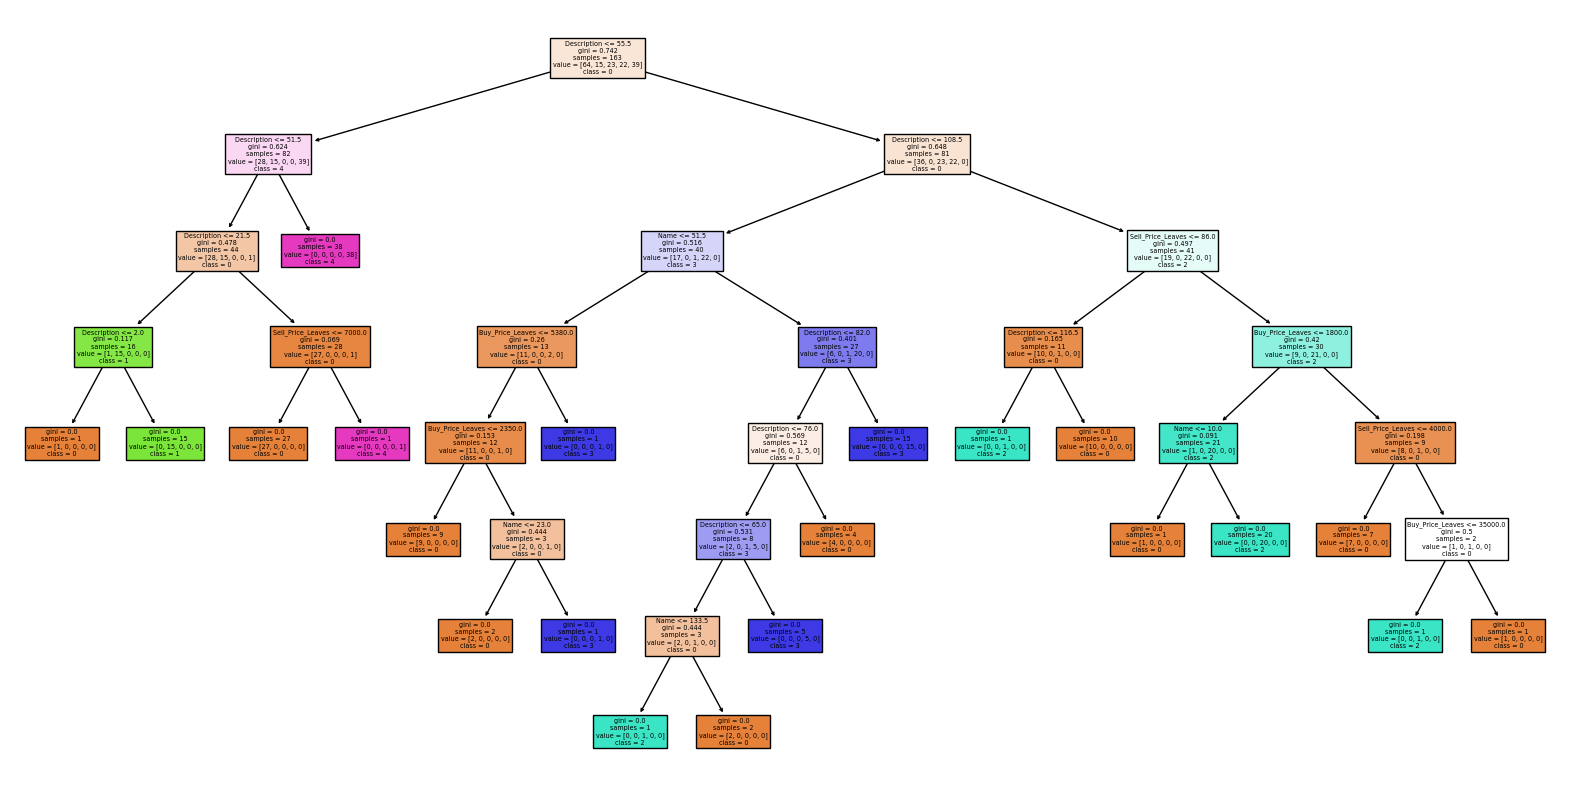

In [19]:
# Visualisasi Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())], filled=True)
plt.show()